# Download data

In [88]:
from download_file import *

In [2]:
url = "https://s3-us-west-1.amazonaws.com/udacity-selfdrivingcar/traffic-signs-data.zip"
download_dir = '..//..//datasets_collection//Traffic_Sign_Classifier'
maybe_download_and_extract(url, download_dir)

- Download progress: 100.0%
Download finished. Extracting files.
Done.


# importing some useful packages

In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import math
import cv2
import time as time
from sklearn.preprocessing import OneHotEncoder
from sklearn.cross_validation import train_test_split
import numpy as np
%matplotlib inline
import tensorflow as tf
from PIL import Image
import time
from datetime import timedelta
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

D:\Anaconda_36\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers, optimizers

Using TensorFlow backend.


In [433]:
import plotly
import plotly.figure_factory as ff
import plotly.graph_objs as go
from IPython.display import clear_output, Image, display, HTML
from sklearn import preprocessing
from sklearn.model_selection import StratifiedShuffleSplit
import math
from tqdm import tqdm

plotly.offline.init_notebook_mode(connected=True)

# Read data

In [452]:
def read_data_sets(file):
    """
    Load pickled data
    args:
        file   (str)     path to datasets 
    yields:
        features and label of datasets (numpy array)
    """
    with open(file, mode='rb') as f:
        return pickle.load(f)

In [570]:
# Load pickled data
import pickle

data_rel_path = "..\\..\\datasets_collection\\Traffic_Sign_Classifier"
# the data augmentation was done in another notebook: Data aumentation.ipynb

train = read_data_sets(os.path.join(data_rel_path, "aug_train_600.p"))
valid= read_data_sets(os.path.join(data_rel_path, "valid.p")) 
test = read_data_sets(os.path.join(data_rel_path, "test.p")) 

    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
X_valid, y_valid = valid['features'], valid['labels']

In [455]:
data_pd = pd.read_csv(os.path.join(data_rel_path, 'signnames.csv'))

# Dataset Exploration

## Dataset Summary

In [458]:
n_train = len(y_train)
n_test = len(y_test)
image_shape = np.shape(X_train[1])
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 41469
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


## Exploratory Visualization

In [459]:
def plot_random_3C(n_row,n_col,X,y):

    plt.figure(figsize = (11,8))
    gs1 = gridspec.GridSpec(n_row,n_row)
    gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes. 

    for i in range(n_row*n_col):
        # i = i + 1 # grid spec indexes from 0
        ax1 = plt.subplot(gs1[i])
        plt.axis('on')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        ax1.set_aspect('equal')
        #plt.subplot(4,11,i+1)
        ind_plot = np.random.randint(1,len(y))
        plt.imshow(X[ind_plot])
        plt.text(2,4,str(y[ind_plot]),
             color='k',backgroundcolor='c')
        plt.axis('off')
    plt.show()
def plot_random_1C(n_row,n_col,X,y):

    plt.figure(figsize = (11,8))
    gs1 = gridspec.GridSpec(n_row,n_row)
    gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes. 

    for i in range(n_row*n_col):
        # i = i + 1 # grid spec indexes from 0
        ax1 = plt.subplot(gs1[i])
        plt.axis('on')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        ax1.set_aspect('equal')
        #plt.subplot(4,11,i+1)
        ind_plot = np.random.randint(1,len(y))
        plt.imshow(X[ind_plot],cmap='gray')
        plt.text(2,4,str(y[ind_plot]),
             color='k',backgroundcolor='c')
        plt.axis('off')
    plt.show()   
def plot_random_preprocess(n_row,n_col,X,y):

    plt.figure(figsize = (11,8))
    gs1 = gridspec.GridSpec(n_row,n_row)
    gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes. 

    for i in range(n_row*n_col):
        # i = i + 1 # grid spec indexes from 0
        ax1 = plt.subplot(gs1[i])
        plt.axis('on')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        ax1.set_aspect('equal')
        #plt.subplot(4,11,i+1)
        ind_plot = np.random.randint(1,len(y))
        plt.imshow(pre_process_image(X[ind_plot]),cmap='gray')
        plt.text(2,4,str(y[ind_plot]),
             color='k',backgroundcolor='c')
        plt.axis('off')
    plt.show()

### original images

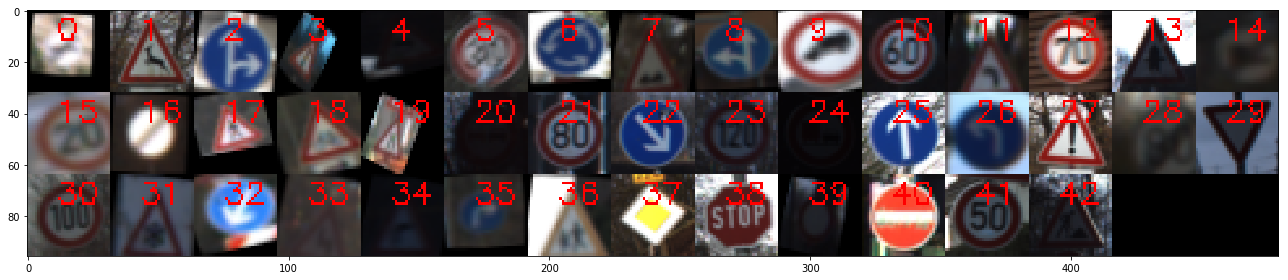

In [460]:
# plot_random_3C(4,4,X_train,y_train)
import scipy.misc as sm
def plot_label_image(file):
    image_every_class=dict()
    for im,cl in zip(train['features'],train['labels']):
        image_every_class[cl]=im

    image_every_class=list(image_every_class.values()) # each images represent a image of the class 

    cols=15
    rows=1+len(image_every_class)//cols
    n_classes = len(image_every_class) # 43
    image_padding = n_classes%cols
    
    for y in range(rows):
        if y==rows-1: #last row
            img_last=np.concatenate(image_every_class[-image_padding:],axis=1)
            img_empty=np.zeros((32, 32*(cols - image_padding), 3))
            img_row=np.concatenate((img_last, img_empty),axis=1)
        else:
            img_row=np.concatenate(image_every_class[y*cols:(y+1)*cols],axis=1)        
        if y==0:
            image=img_row
        else:
            image=np.concatenate((image,img_row),axis=0) 

    # add class number
    for y in range(0,1+int(len(image_every_class)/cols)):
        for x in range(cols):
            if(x+y*cols<n_classes):
                cv2.putText(image,str(x+y*cols),(11+x*32,11+y*32), cv2.FONT_HERSHEY_SIMPLEX, 0.4,(255,0,0),1,cv2.LINE_AA)
#     # resize image
    fig, ax = plt.subplots(figsize=(18, 4))
    c =sm.imresize(image,(image.shape[0],image.shape[1]))
    ax.imshow(c, aspect='auto')
    plt.tight_layout() 
    
plot_label_image(train)

### frequency table of training set

In [464]:
data_i = [[i,sum(y_train == i)] for i in range(len(np.unique(y_train)))]
data_i_sorted = sorted(data_i, key=lambda x: x[1])

In [465]:
data_pd['Occurance'] = pd.Series(np.asarray(data_i_sorted).T[1], index=np.asarray(data_i_sorted).T[0])
data_pd_sorted = data_pd.sort_values(['Occurance'],ascending=[0])
data_pd_sorted = data_pd_sorted.reindex(data_pd_sorted["ClassId"])
data_pd_sorted = data_pd.sort_values(['Occurance'],ascending=[0])
data_pd_sorted = data_pd_sorted.drop(['ClassId'], axis = 1)

In [488]:
data_pd_sorted.sort_index()

,SignName,Occurance
0,Speed limit (20km/h),600
1,Speed limit (30km/h),1980
2,Speed limit (50km/h),2010
3,Speed limit (60km/h),1260
4,Speed limit (70km/h),1770
5,Speed limit (80km/h),1650
6,End of speed limit (80km/h),600
7,Speed limit (100km/h),1290
8,Speed limit (120km/h),1260
9,No passing,1320


## bar chart of training set

<Container object of 43 artists>

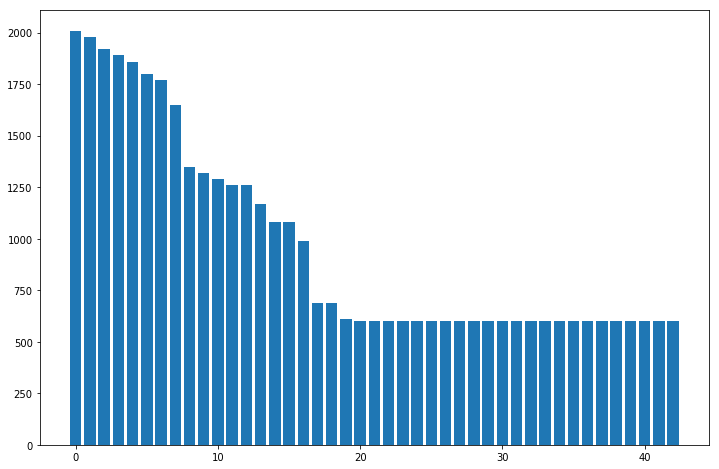

In [467]:
plt.figure(figsize=(12,8))
plt.bar(range(43),height=data_pd_sorted["Occurance"])

# Design and Test a Model Architecture

## Preprocessing

### histogram equalization: 
* reason: The contrast of brightness will be enhanced.

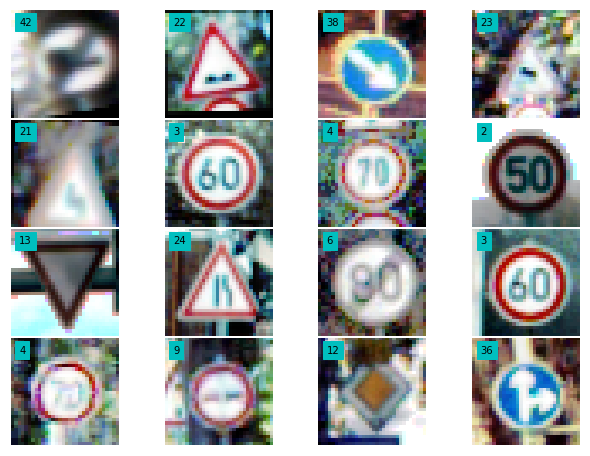

In [472]:
def pre_process_image(image):

    #image = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
    #image = image[:,:,0]
    image[:,:,0] = cv2.equalizeHist(image[:,:,0])
    image[:,:,1] = cv2.equalizeHist(image[:,:,1])
    image[:,:,2] = cv2.equalizeHist(image[:,:,2])
    image = image/255.-.5
    #image = cv2.resize(image, (img_resize,img_resize),interpolation = cv2.INTER_CUBIC)
    return image

img_resize = 32
N_classes = 43
image_shape = (img_resize,img_resize)
img_size_flat = img_resize*img_resize

image_GS_train = np.array([pre_process_image(X_train[i]) for i in range(len(X_train))],
                          dtype = np.float32)
image_GS_test = np.array([pre_process_image(X_test[i]) for i in range(len(X_test))],
                          dtype = np.float32)

plot_random_3C(4,4,image_GS_train+.5,y_train)

In [468]:
img_size = 30

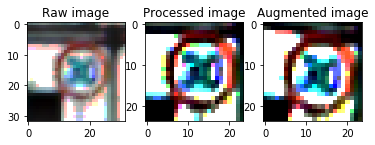

Final image size is (24, 24, 3)


In [469]:
#Some useful image functions
  
def show3img(img, img1, img2):
    plt.figure(figsize=(6, 2))
    plt.subplot(1, 3, 1)
    plt.imshow(img)
    plt.title("Raw image")
    plt.subplot(1, 3, 2)
    plt.imshow(img1)
    plt.title("Processed image")
    plt.subplot(1, 3, 3)
    plt.imshow(img2)
    plt.title("Augmented image")
    plt.show()
    
def eq_Hist(img):
    #Histogram Equalization
    img2=img.copy() 
    img2[:, :, 0] = cv2.equalizeHist(img[:, :, 0])
    img2[:, :, 1] = cv2.equalizeHist(img[:, :, 1])
    img2[:, :, 2] = cv2.equalizeHist(img[:, :, 2])
    return img2

def scale_img(img):
    img2=img.copy()
    sc_y=0.4*np.random.rand()+1.0
    img2=cv2.resize(img, None, fx=1, fy=sc_y, interpolation = cv2.INTER_CUBIC)
    c_x,c_y, sh = int(img2.shape[0]/2), int(img2.shape[1]/2), int(img_size/2)
    return img2

def crop(img, mar=0):
    c_x,c_y, sh = int(img.shape[0]/2), int(img.shape[1]/2), int(img_size/2-mar)
    return img[(c_x-sh):(c_x+sh),(c_y-sh):(c_y+sh)]

def rotate_img(img):
    c_x,c_y = int(img.shape[0]/2), int(img.shape[1]/2)
    ang = 30.0*np.random.rand()-15
    Mat = cv2.getRotationMatrix2D((c_x, c_y), ang, 1.0)
    return cv2.warpAffine(img, Mat, img.shape[:2])

def sharpen_img(img):
    gb = cv2.GaussianBlur(img, (5,5), 20.0)
    return cv2.addWeighted(img, 2, gb, -1, 0)
#Compute linear image transformation ing*s+m
def lin_img(img,s=1.0,m=0.0):
    img2=cv2.multiply(img, np.array([s]))
    return cv2.add(img2, np.array([m]))

#Change image contrast; s>1 - increase
def contr_img(img, s=1.0):
    m=127.0*(1.0-s)
    return lin_img(img, s, m)

def transform_img(img):
    img2=sharpen_img(img)
    img2=crop(img2,3)
    img2=contr_img(img2, 1.5)
    return eq_Hist(img2)

def augment_img(img):
    img=contr_img(img, 1.8*np.random.rand()+0.2)
    img=rotate_img(img)
    img=scale_img(img)
    return transform_img(img)

x_selected = X_train[y_train == 1]
im=x_selected[60, :, :, :]
imp=contr_img(im, 0.5)

show3img(im, transform_img(im), augment_img(im))
print("Final image size is", transform_img(im).shape)

In [470]:
X_train_equalize = list()
X_test_equalize = list()
X_valid_equalize = list()

for i in range(len(X_train)):
    X_train_equalize.append(transform_img(X_train[i]))
for i in range(len(X_test)):
    X_test_equalize.append(transform_img(X_test[i]))    
for i in range(len(X_valid)):
    X_valid_equalize.append(transform_img(X_valid[i]))

In [471]:
X_train_equalize = np.array(X_train_equalize)
X_test_equalize = np.array(X_test_equalize)
X_valid_equalize = np.array(X_valid_equalize)

### normalization: 
* reason: improve learninig speed
* method: scaled images between -.5 and .5, by dividing by 255. and subtracting .5.

In [16]:
X_train_norm = X_train_equalize/255.
X_test_norm = X_test_equalize/255.
X_valid_norm = X_valid_equalize/255.

### One hot encoding

In [ ]:
def OHE_labels(Y_tr,N_classes):
    OHC = OneHotEncoder()
    
    Y_ohc = OHC.fit(np.arange(N_classes).reshape(-1, 1))
    Y_labels = Y_ohc.transform(Y_tr.reshape(-1, 1)).toarray()
    return Y_labels

def check_OHE(cls,y):
    check = np.linalg.norm(np.argmax(cls,axis=1)-y)
    if check == 0:
        print('One hot encoding correct, ok to proceed')
    else:
        print('One hot encoding doesnt match the output, check code!!!')


In [473]:
labels_train = OHE_labels(y_train,43)
labels_test = OHE_labels(y_test,43)
labels_valid = OHE_labels(y_valid,43)

check_OHE(labels_test,y_test)
check_OHE(labels_train,y_train)

One hot encoding correct, ok to proceed
One hot encoding correct, ok to proceed


### data augmentation (Keras version): 

* Because of limited data and the class imbalance, additional data was generated by affine transformation including 
    1. **rotation** with random number generated between +/- 15 degress
    2. **translation** by +/- 10 pixels along vertical and horizontal direction
    3. **shearing**

In [78]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
    )
datagen.fit(X_train_norm)

## Model

### Model Architechture

In [42]:
def create_model(baseMapNum = 32, weight_decay = 1e-4, num_classes = 43):    
    model = Sequential()
    # 1: convolution: kernel size 3x3
    model.add(Conv2D(baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=X_train_norm.shape[1:]))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    # 2: maxpool: kernel size 2x2
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(Dropout(0.2))

    # 3: convolution: kernel size 3x3
    model.add(Conv2D(2*baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    # 4: maxpool: kernel size 2x2
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(Dropout(0.2))
    
    # 5: convolution: kernel size 3x3
    model.add(Conv2D(4*baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    # 6: maxpool: kernel size 2x2
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(Dropout(0.3))
    
    model.add(Flatten())
    
    # 7: fully-connected layter 256
    model.add(Dense(256))
#     model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    
    # 8: fully-connected layter 128
    model.add(Dense(128))
#     model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.1))
    
    # 9: fully-connected layter 43
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    return model


In [21]:
model = create_model(baseMapNum = 32, weight_decay = 1e-4, num_classes = 43)

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 24, 24, 32)        896       
_________________________________________________________________
batch_normalization_7 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
activation_13 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
batch_normalization_8 (Batch (None, 12, 12, 64)        256       
__________

### Training the model

In [23]:
from keras.optimizers import Adam

In [24]:
opt_adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8, decay=0.0001)
model.compile(loss='categorical_crossentropy',
              optimizer=opt_adam,
              metrics=['accuracy'])

In [25]:
history = model.fit(X_train_norm, labels_train,
                  batch_size=64,
                  epochs=10,
                  validation_data=(X_test_norm, labels_test),
                  verbose=1,
                  shuffle=True)    


Train on 41469 samples, validate on 12630 samples
Epoch 1/10
41469/41469 [==============================] - 98s 2ms/step - loss: 1.8949 - acc: 0.4456 - val_loss: 0.8899 - val_acc: 0.7343
Epoch 2/10
41469/41469 [==============================] - 117s 3ms/step - loss: 0.7907 - acc: 0.7515 - val_loss: 0.5148 - val_acc: 0.8529
Epoch 3/10
41469/41469 [==============================] - 117s 3ms/step - loss: 0.5693 - acc: 0.8281 - val_loss: 0.4431 - val_acc: 0.8767
Epoch 4/10
41469/41469 [==============================] - 128s 3ms/step - loss: 0.4601 - acc: 0.8625 - val_loss: 0.4125 - val_acc: 0.8873
Epoch 5/10
41469/41469 [==============================] - 151s 4ms/step - loss: 0.3971 - acc: 0.8842 - val_loss: 0.3762 - val_acc: 0.8974
Epoch 6/10
41469/41469 [==============================] - 138s 3ms/step - loss: 0.3579 - acc: 0.8985 - val_loss: 0.3495 - val_acc: 0.9043
Epoch 7/10
41469/41469 [==============================] - 121s 3ms/step - loss: 0.3272 - acc: 0.9080 - val_loss: 0.3630 - v

In [193]:
model.save_weights('model//keras_german_sign_ADAM_weighted_93_2.h5')

# Restore model and continue training

The computation resource on local machine is based on CPU. To accelerate the model training, GPU on AWS EC2 was used to train the model. The main training par is in **model_ec2.ipynb**

In [707]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.layers import Lambda, Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Dropout, Flatten, Activation, Cropping2D
from keras.layers.convolutional import Convolution2D


In [757]:
INPUT_SHAPE = (66,200,3)
model = Sequential()
model.add(Cropping2D(cropping=((6, 25), (0, 0)), input_shape=INPUT_SHAPE, name="crop"))
model.add(Lambda(lambda x: x/255-0.5, name="normalization"))
model.add(Convolution2D(32, 5, 5, activation='elu', name="conv_1"))
model.add(Convolution2D(64, 3, 3, activation='elu', name="conv_2"))
model.add(MaxPooling2D(pool_size=(2, 2), name="maxpool_1"))
model.add(Dropout(0.5, name="dropout_1"))
model.add(Flatten(name="flatten_1"))
model.add(Dense(128, activation='elu', name="fc_1"))
model.add(Dropout(0.5, name="dropout_2"))
model.add(Dense(5, name="output"))

In [753]:
print (model.get_layer("maxpool_1").input)
# model.layers

Tensor("conv_2_2/Elu:0", shape=(?, 29, 194, 64), dtype=float32)


In [43]:
from keras.models import load_model
# load_weights only sets the weights of your network. You still need to define its architecture before calling load_weights

In [426]:
model2 = create_model()

In [427]:
model2.load_weights('model//EC2_model//keras_german_sign_ADAM_weighted_93_2.h5')

In [428]:
opt_adam = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-8, decay=0.000001)
model2.compile(loss='categorical_crossentropy',
              optimizer=opt_adam,
              metrics=['accuracy'])

## Early stopping

The accuracy of test set will increase and then decrease due to the overfitting. Therefore, if the accuracy achieve 93%, the training will be stopped. 

In [429]:
while history.history["val_acc"] < 0.93:
    history = model2.fit(X_train_norm, labels_train,
              batch_size=64,
              epochs=1,
              validation_data=(X_test_norm, labels_test),
              verbose=1,
              shuffle=True)    

Train on 41469 samples, validate on 12630 samples
Epoch 1/1
41469/41469 [==============================] - 129s 3ms/step - loss: 0.0854 - acc: 0.9784 - val_loss: 0.3601 - val_acc: 0.9350


In [615]:
scores = model2.evaluate(X_train_norm, labels_train, batch_size=64, verbose=1)

41469/41469 [==============================] - ETA: 55 - ETA: 45 - ETA: 41 - ETA: 40 - ETA: 39 - ETA: 38 - ETA: 38 - ETA: 40 - ETA: 39 - ETA: 39 - ETA: 39 - ETA: 39 - ETA: 39 - ETA: 39 - ETA: 38 - ETA: 38 - ETA: 38 - ETA: 38 - ETA: 38 - ETA: 38 - ETA: 38 - ETA: 38 - ETA: 38 - ETA: 38 - ETA: 38 - ETA: 38 - ETA: 38 - ETA: 38 - ETA: 38 - ETA: 38 - ETA: 38 - ETA: 38 - ETA: 38 - ETA: 38 - ETA: 38 - ETA: 38 - ETA: 38 - ETA: 38 - ETA: 38 - ETA: 39 - ETA: 39 - ETA: 39 - ETA: 39 - ETA: 39 - ETA: 39 - ETA: 39 - ETA: 39 - ETA: 39 - ETA: 39 - ETA: 39 - ETA: 39 - ETA: 39 - ETA: 38 - ETA: 38 - ETA: 38 - ETA: 38 - ETA: 38 - ETA: 38 - ETA: 38 - ETA: 38 - ETA: 38 - ETA: 38 - ETA: 38 - ETA: 38 - ETA: 38 - ETA: 38 - ETA: 38 - ETA: 38 - ETA: 38 - ETA: 38 - ETA: 38 - ETA: 38 - ETA: 38 - ETA: 38 - ETA: 38 - ETA: 38 - ETA: 38 - ETA: 38 - ETA: 38 - ETA: 38 - ETA: 38 - ETA: 38 - ETA: 38 - ETA: 38 - ETA: 38 - ETA: 38 - ETA: 38 - ETA: 38 - ETA: 38 - ETA: 38 - ETA: 38 - ETA: 37 - ETA: 37 - ETA: 37 - ETA: 37 - ETA

In [616]:
print('\nvalid result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))


valid result: 98.720 loss: 0.057


In [613]:
scores = model2.evaluate(X_test_norm, labels_test, batch_size=64, verbose=1)

12630/12630 [==============================] - ETA: 11 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 9 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 

In [614]:
print('\nvalid result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))


valid result: 93.500 loss: 0.360


## History log of accuracy and loss

In [431]:
history.history

{'acc': [0.97841761315537856],
 'loss': [0.085400907384434843],
 'val_acc': [0.93499604116237456],
 'val_loss': [0.36014783016198793]}

# Test on testing set

## Compute accuracy

In [51]:
scores = model2.evaluate(X_valid_norm, labels_valid, batch_size=64, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))

4410/4410 [==============================] - 5s 1ms/step

Test result: 93.016 loss: 0.401


## Confusion matrix

In [474]:
from sklearn.metrics import confusion_matrix
y_predict_conf = model2.predict_classes(X_valid_norm)

4410/4410 [==============================] - ETA: 52 - ETA: 19 - ETA: 13 - ETA: 10 - ETA: 8 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 4s 971us/step


In [475]:
from sklearn.metrics import classification_report
target_names = [str(i) for i in range(43)]

In [642]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)
    plt.figure(figsize=(20, 20))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
#     plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return cm

### error analysis

This part focuses on the wrongly predicted classes

In [504]:
def Get_wrong_predictions(y_true_conf, y_predict_conf):
    wrong_index = np.nonzero(y_true_conf - y_predict_conf)
    return {"wrong_prediction_index": wrong_index
            , "wrong_prediction_true_class":y_true_conf[wrong_index]
            , "wrong_prediction_pred_class":y_predict_conf[wrong_index]}

In [498]:
y_true_conf = np.argmax(labels_valid, axis=1)

In [506]:
Error_result = Get_wrong_predictions(y_true_conf,y_predict_conf)

* the indices of wrongly predicted images 

In [561]:
Error_result["wrong_prediction_index"][0]

array([   1,   52,   58,   59,   60,   61,   62,   63,   64,   65,   66,
         67,   68,   69,   70,   71,   72,   73,   74,   75,   76,   77,
         78,   79,   80,   81,   82,   83,   84,   85,   86,   87,   88,
         89,  242,  270,  271,  296,  297,  299,  300,  301,  302,  303,
        304,  305,  306,  390,  391,  392,  393,  394,  396,  399,  450,
        453,  549,  550,  551,  552,  553,  554,  555,  559,  562,  563,
        564,  565,  566,  567,  568,  569,  696,  697,  698,  699,  700,
        701,  702,  703,  704,  705,  706,  707,  708,  709,  710,  711,
        712,  713,  714,  930,  931,  932,  933,  934,  935,  936,  937,
        938,  939,  940,  941,  942,  943,  944,  945,  946,  947,  948,
        949,  950,  951,  952,  953,  954,  955,  956,  957,  958,  959,
       1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120,
       1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131,
       1132, 1133, 1134, 1135, 1136, 1137, 1138, 11

In [527]:
Error_result["wrong_prediction_true_class"]

array([41, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31,
       31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31,
       23, 23, 23, 23, 23, 23,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40,
       40, 40, 40, 40, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4, 11, 11,
       42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 27, 24, 24, 24, 24,
       24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       24, 24, 24,  5,  5,  5,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8

* class 8(Speed limit (120km/h)) has highest error rate, and most of them were classified as class 19(Dangerous curve to the left).

In [644]:
Error_result["wrong_prediction_index"][0][Error_result["wrong_prediction_true_class"]==8]

array([2070, 2076, 2083, 2130, 2131, 2132, 2133, 2134, 2135, 2136, 2137,
       2138, 2139, 2140, 2141, 2142, 2143, 2144, 2145, 2146, 2147, 2148,
       2149, 2150, 2151, 2152, 2153, 2154, 2155, 2156, 2157, 2158, 2159], dtype=int64)

In [645]:
Error_result["wrong_prediction_true_class"][Error_result["wrong_prediction_true_class"]==8]

array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8], dtype=int64)

In [647]:
Error_result["wrong_prediction_pred_class"][Error_result["wrong_prediction_true_class"]==8]

array([ 5,  5,  7, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,  9,  9, 38, 19], dtype=int64)

In [665]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
sample08 = clahe.apply(cv2.cvtColor(X_valid[2130], cv2.COLOR_RGB2GRAY))

In [666]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
sample19 = clahe.apply(cv2.cvtColor(X_train[y_train == 19][10], cv2.COLOR_RGB2GRAY))

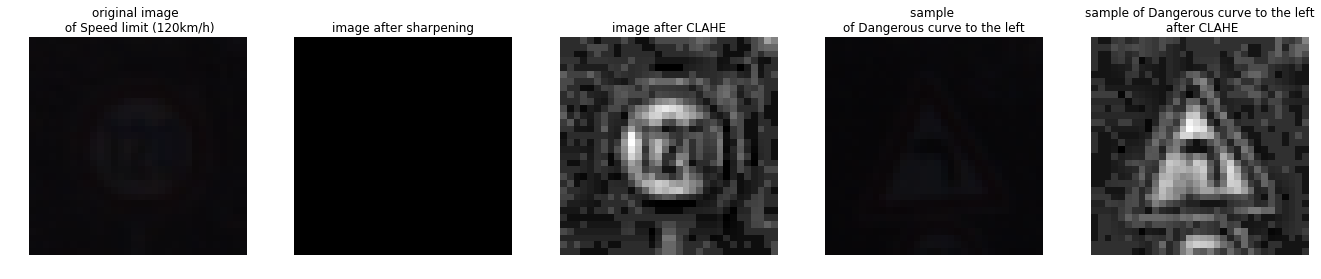

In [679]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(23, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(X_valid[2130], cmap=plt.cm.gray)
ax1.set_title('original image \n of Speed limit (120km/h)')
ax1.set_adjustable('box-forced')


ax2.axis('off')
ax2.imshow(cv2.resize(transform_img(X_valid[2130]), (32,32)), cmap=plt.cm.gray)
ax2.set_title('image after sharpening')
ax1.set_adjustable('box-forced')

ax3.axis('off')
ax3.imshow(sample08, cmap=plt.cm.gray)
ax3.set_title('image after CLAHE')
ax1.set_adjustable('box-forced')

ax4.axis('off')
ax4.imshow(X_train[y_train == 19][10], cmap=plt.cm.gray)
ax4.set_title('sample \nof Dangerous curve to the left')
ax1.set_adjustable('box-forced')

ax5.axis('off')
ax5.imshow(sample19, cmap=plt.cm.gray)
ax5.set_title('sample of Dangerous curve to the left\n after CLAHE')
ax1.set_adjustable('box-forced')

plt.show()

* class 4(Speed limit (70km/h)) has highest error rate, and most of them were classified as class 19(Dangerous curve to the left).

In [589]:
Error_result["wrong_prediction_index"][0][Error_result["wrong_prediction_true_class"]==4]

array([ 930,  931,  932,  933,  934,  935,  936,  937,  938,  939,  940,
        941,  942,  943,  944,  945,  946,  947,  948,  949,  950,  951,
        952,  953,  954,  955,  956,  957,  958,  959, 1110, 1111, 1112,
       1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123,
       1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134,
       1135, 1136, 1137, 1138, 1139], dtype=int64)

In [590]:
Error_result["wrong_prediction_true_class"][Error_result["wrong_prediction_true_class"]==4]

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int64)

In [591]:
Error_result["wrong_prediction_pred_class"][Error_result["wrong_prediction_true_class"]==4]

array([19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 10, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 10, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 19], dtype=int64)

In [636]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
sample04 = clahe.apply(cv2.cvtColor(X_valid[930], cv2.COLOR_RGB2GRAY))

In [637]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
sample19 = clahe.apply(cv2.cvtColor(X_train[y_train == 19][10], cv2.COLOR_RGB2GRAY))

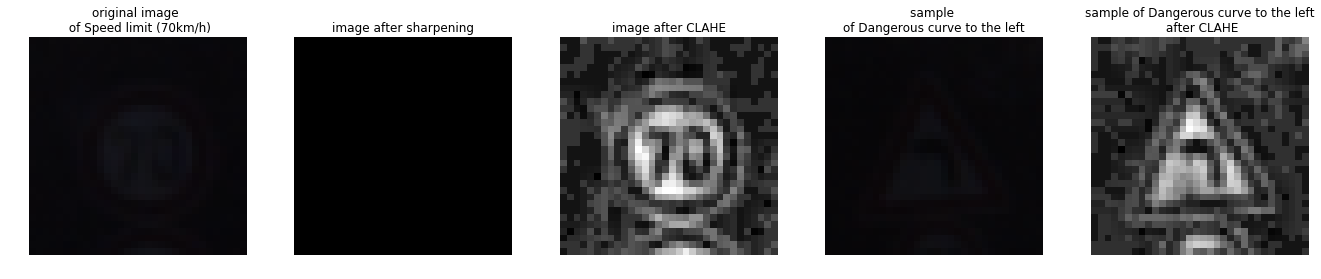

In [681]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(23, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(X_valid[930], cmap=plt.cm.gray)
ax1.set_title('original image \n of Speed limit (70km/h)')
ax1.set_adjustable('box-forced')


ax2.axis('off')
ax2.imshow(cv2.resize(transform_img(X_valid[930]), (32,32)), cmap=plt.cm.gray)
ax2.set_title('image after sharpening')
ax1.set_adjustable('box-forced')

ax3.axis('off')
ax3.imshow(sample04, cmap=plt.cm.gray)
ax3.set_title('image after CLAHE')
ax1.set_adjustable('box-forced')

ax4.axis('off')
ax4.imshow(X_train[y_train == 19][10], cmap=plt.cm.gray)
ax4.set_title('sample \nof Dangerous curve to the left')
ax1.set_adjustable('box-forced')

ax5.axis('off')
ax5.imshow(sample19, cmap=plt.cm.gray)
ax5.set_title('sample of Dangerous curve to the left\n after CLAHE')
ax1.set_adjustable('box-forced')

plt.show()

* class 4(Speed limit (70km/h)) indeed looks like the general cases in class 19(Dangerous curve to the left)
* We can find that after CLAHE make the Speed limit (70km/h) more recognizable than histogram equalization

In [ ]:
import csv

with open(os.path.join(data_rel_path , 'signnames.csv')) as csvfile:
    csv_reader = csv.reader(csvfile, delimiter=',')
    signname = []
    for row_id,row in enumerate(csv_reader):
        if row_id == 0:
            pass
        else:
            signname.append(row[1])

import os
signs_dir = 'img//signs'
signs_images=os.listdir(signs_dir)
ground_truth_signs = []
ground_truth_labels = []
for img_name in signs_images:
    img = cv2.imread(os.path.join(signs_dir, img_name))
    ground_truth_signs.append(img[:,:,::-1])
    ground_truth_labels.append(int(img_name.split('.')[0]))
ground_truth_labels = np.array(ground_truth_labels)

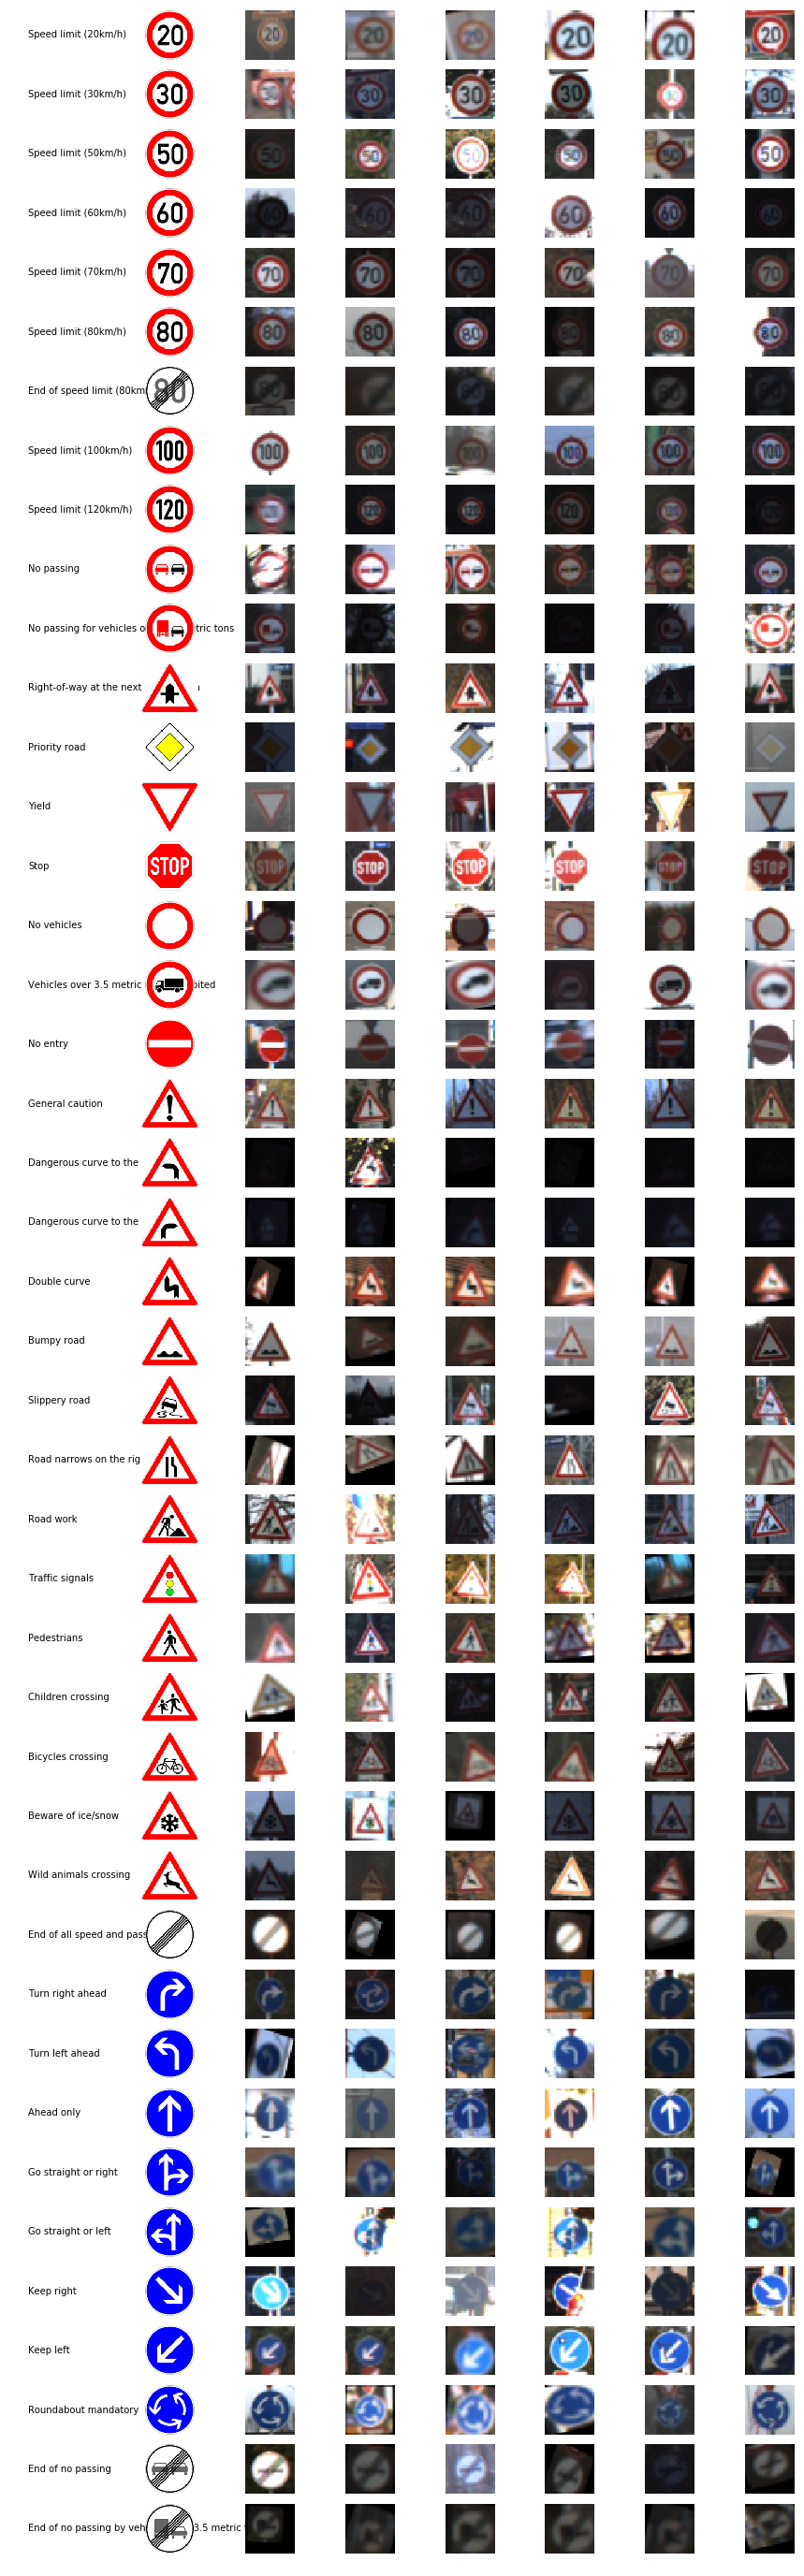

In [609]:
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(n_classes, 8)

data_index = [np.where(np.array(y_train)==classid)[0] for classid in range(n_classes)]
# plot samples for each traffic signs 
data_set_fig = plt.figure(num=1,figsize=(15, 50))
# st = data_set_fig.suptitle("Training  DataSet Samples", fontsize="x-large")
ax = []
for class_id in range(n_classes):
    # plot ground truth label
    ax.append(data_set_fig.add_subplot(gs[class_id, 0]))
    ax[-1].text(0, 0.6, signname[class_id], ha='left', va='top', wrap=True)
    ax[-1].set_axis_off()
    
    # plot ground truth image
    ax.append(data_set_fig.add_subplot(gs[class_id, 1]))
    gt_image_id = np.where(np.array(ground_truth_labels)==class_id)[0][0]
    ax[-1].imshow(ground_truth_signs[gt_image_id])
    ax[-1].set_axis_off()
    # plot random samples for each class
    index = np.random.choice(data_index[class_id], 6,replace=False)
    for sample in range(6):
        image = X_train[index[sample]].squeeze()
        ax.append(data_set_fig.add_subplot(gs[class_id, sample+2]))
        ax[-1].imshow(image)
        ax[-1].set_axis_off()

In [552]:
data_pd_sorted.sort_index()

,SignName,Occurance
0,Speed limit (20km/h),600
1,Speed limit (30km/h),1980
2,Speed limit (50km/h),2010
3,Speed limit (60km/h),1260
4,Speed limit (70km/h),1770
5,Speed limit (80km/h),1650
6,End of speed limit (80km/h),600
7,Speed limit (100km/h),1290
8,Speed limit (120km/h),1260
9,No passing,1320


Confusion matrix, without normalization
[[ 30   0   0 ...,   0   0   0]
 [  1 224   5 ...,   0   0   0]
 [  0   2 233 ...,   0   0   1]
 ..., 
 [  0   1   0 ...,  44   0   0]
 [  0   0   0 ...,   0  29   0]
 [  0   0   0 ...,   0   1  18]]


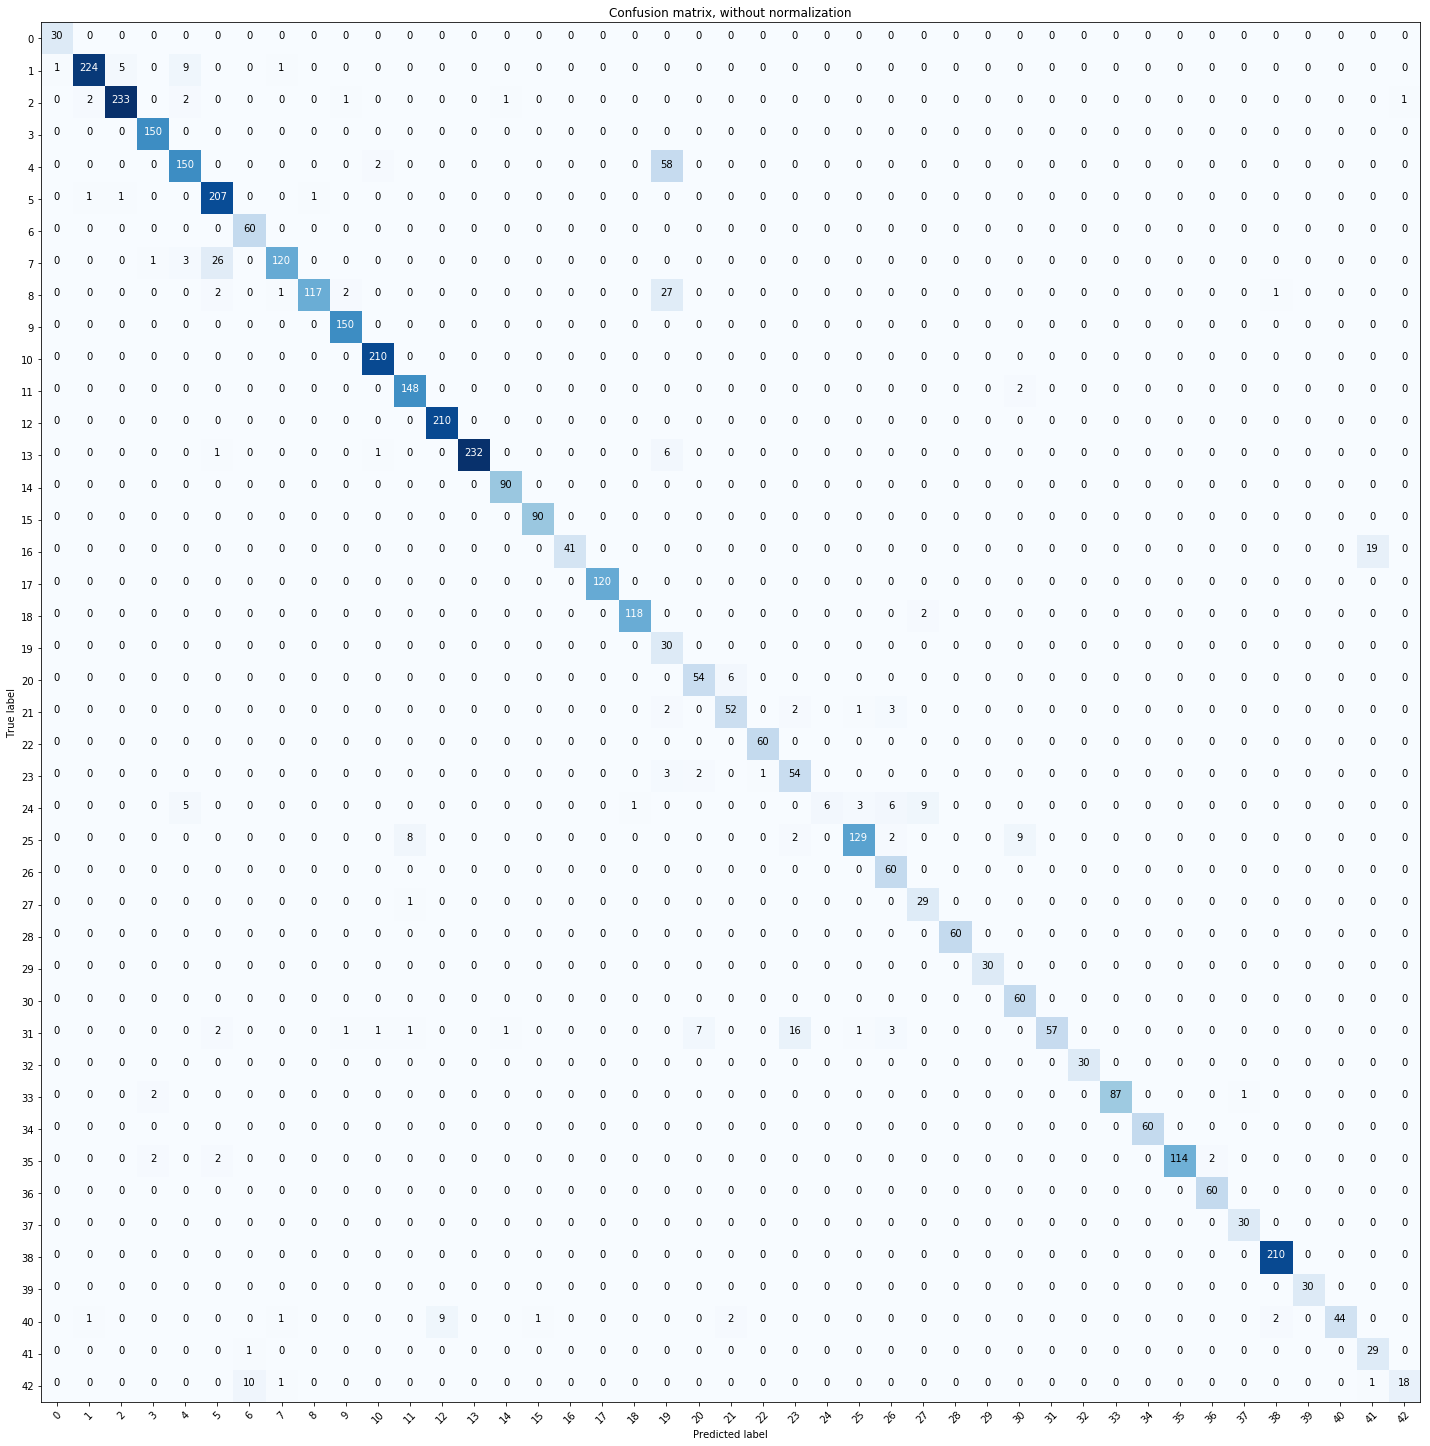

In [643]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(np.argmax(labels_valid, axis=1), y_predict_conf)
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
non_normalized_cm = plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix, without normalization')
print (non_normalized_cm)

# Plot normalized confusion matrix
# plt.figure()
# normalized_cm = plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=True,
#                       title='Normalized confusion matrix')

plt.show()

# Test a Model on New Images

## Preprocess test images
* Download 10 images of German traffic signs from the Internet 
* Build the mappings from the class id to the actual sign name with `signnames.csv` 
* Predict the sign type for each image

In [ ]:
SignName = np.array(data_pd_sorted.sort_index()["SignName"])

In [269]:
test_images_path = 'test_images'
new_test_images = []
new_test_labels = []

for i in os.listdir(test_images_path):
    img = cv2.imread(os.path.join(test_images_path,i))   
    img = cv2.resize(img, (32,32))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    new_test_labels.append(i.split(".")[0])
    new_test_images.append(img)

In [270]:
new_test_images = np.array(new_test_images)
new_test_labels = np.array(new_test_labels)
print (new_test_images.shape)
print (new_test_labels.shape)

(10, 32, 32, 3)
(10,)


In [279]:
new_test_images_equalize = []
for i in range(len(new_test_images)):
    new_test_images_equalize.append(transform_img(new_test_images[i]))

In [284]:
new_test_images_equalize = np.array(new_test_images_equalize)
new_test_images_X = new_test_images_equalize/255.
new_test_images_Y = OHE_labels(new_test_labels,43)

## Analyze Performance

the model predicted 10 out of 10 signs correctly, it gives 100% accurate on these new images.

In [286]:
scores = model2.evaluate(new_test_images_X, new_test_images_Y, batch_size=64, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))

10/10 [==============================] - 0s 47ms/step

Test result: 100.000 loss: 0.012


## Plot top 5 predition

In [288]:
y_pred = model2.predict(new_test_images_X, batch_size=64, verbose=1)

10/10 [==============================] - 0s 33ms/step


For each of the new images, the model's softmax probabilities were printed out to show the **certainty** of the model's predictions based on the output of the top 5 probabilities for each image).

`tf.nn.top_k` will return the **values** and **indices** (class ids) of the top k predictions. So if k=5, for each sign, it'll return the top 5 largest probabilities (out of a possible 43) and the correspoding class ids.

In [692]:
def plot_top_k_predition(plot_cache, k):
    """
    get top 5 probabilities from model
    access to the predition probability with top_5_pred.values and indices with top_5_pred.indices
    """
    output = tf.nn.top_k(plot_cache["label_pred"], k)
    top_k_pred = 0
    with tf.Session() as sess:
        top_k_pred = sess.run(output)
        
    label_list = [data_pd_sorted.loc[j].SignName.tolist() for j in top_k_pred.indices]
    
    plt.figure(figsize=(25, 30))
    m = len(plot_cache["feature"])
    x= 10
    y= 20
    row_img_num = 2
    for i in range(m):
        plt.subplot(m, row_img_num, row_img_num*i+1)  # (row_n, column_n, index)
        plt.imshow(plot_cache["test_images"][i]) 
        plt.title(plot_cache["title"][int(plot_cache["ordinal_label"][i])])
        plt.axis('off')
        
        ind = np.arange(5)  # the x locations for the groups
        width = 0.35       # the width of the bars
        plt.subplot(m, row_img_num, row_img_num*i+2)
        
        rects = plt.barh(np.arange(1, 6, 1), top_k_pred.values[i])
        
        plt.yticks(np.arange(1, 6, 1), label_list[i])
        for i in range(len(rects)):
            plt.text(1, i+1, rects[i].get_width(), ha='right', va='center')
        
    plt.show()

In [693]:
new_test_title = {i: SignName[i] for i in range(len(SignName))}

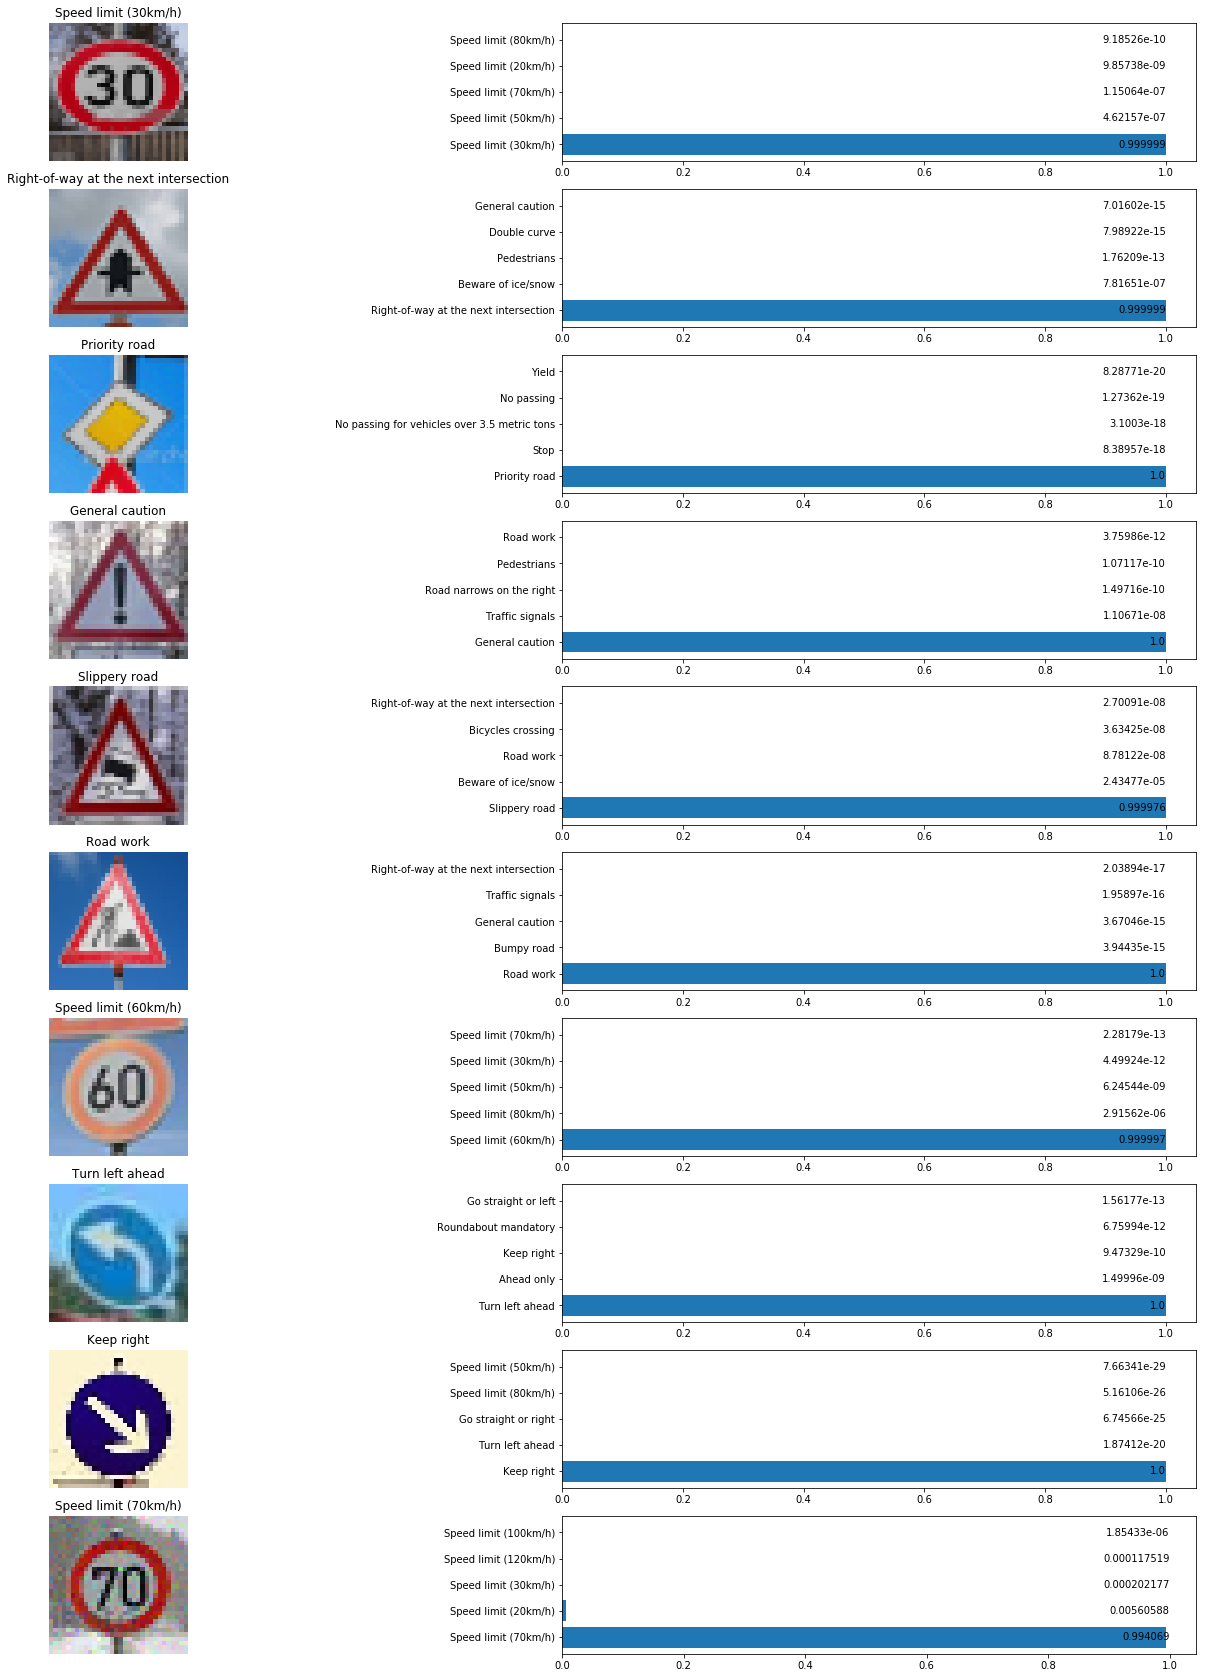

In [694]:
plot_cache = {"title": new_test_title
             , "feature":new_test_images_X
             , "label_pred":y_pred
             , "label_true":new_test_images_Y
             , "test_images":new_test_images
             , "ordinal_label": new_test_labels}

plot_top_k_predition(plot_cache, 5)

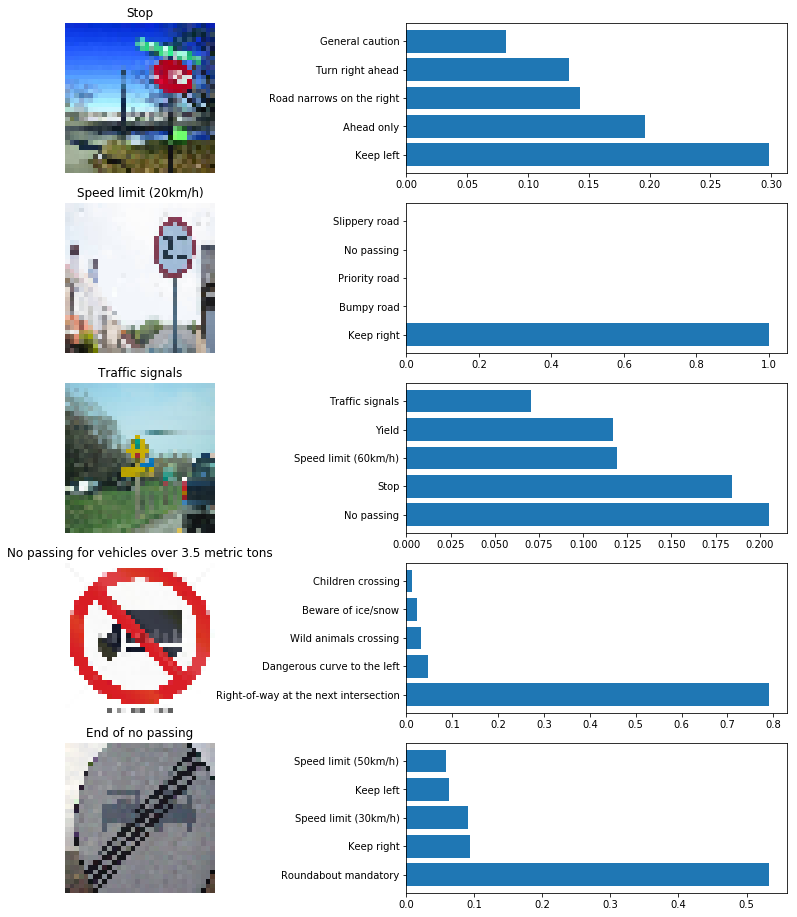

# Conclusion

* test on images from the Internet

When image is clear, the accuracy on test images is very accurate, but the signs could not be recognized if we used the test images from the Internet.
One of the reasons is the issue of size. The image size and ratio from the Internet are quite diverse. Without the aid of object localization, there might be many noises on the image (e.g, car, electric pole, building, etc.) After resizing, the images are seriously distorted, which makes the key features harder to be activated in the model.

* the accuracy and loss

The model can achieve 99% accuracy on training set without regularization techniques(e.g, dropout, L2), but the accuracy on test set and validation set are about 93% and 93.5% respectively. The loss on training, test and validation set are 0.360, 0.401 and 0.057. The high accuracy on the training set but low accuracy on the validation and test set implies overfitting. The change of L2 just made the model more underfitting on both training set and validation set, so the fine-funning works are done on the adjustment of keeping probability. The policy of tuning was to reduce the difference of loss on training set and validation set while achieving 93% accuracy.

* data augmentation, preprocessing and error analysis

Due to the class imbalance, a data augmentation algorithm found on Github was applied to compensate the lack of data number for some categories of traffic signs. The algorithm calculate the number of a class and decide if the image of that class needs to be generated. If the number is less than the threshold, the algorithm will generate 10 images and append them to the origin image. According to the result of error analysis, there was a trend that the misclassified images occured in series. After checking the misclassified images, it turns out that the preprocessing could not enhance the contrast of the dark images well (some are even worse) so that the number of wrongly processed images were generated. If preprocessed images owns some features similar to other classes, that might confuse the model and misclass the image.

# Furture work

Visualize the Neural Network's State with Test Images
This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the LeNet lab's feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper End-to-End Deep Learning for Self-Driving Cars in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

## visualize feature map

In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

## Importing a pre-trained model

### Create the network
`import_meta_graph` loads the network defined in `.meta` file to the current graph, so,this will create the graph/network. After that, we still need to load the pretrained parameters on this graph.

ex: 
```python
saver = tf.train.import_meta_graph('my_test_model-1000.meta')
```

### Load the parameters
We can restore the parameters of the network by calling restore on this saver which is an instance of `tf.train.Saver()` class.

Once you can restore any pre-trained model, you can do fine-tuning, transfer learning or further training.

There is only one checkpoint. If you build another model, the checkpoint file will be overwritten. Each model should be saved in its own direcotry 

## Histogram of Oriented Gradient (HOG) features 
ref http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html

## Visualization the Graph
### Graphviz

In [ ]:
import tensorflow as tf
from graphviz import Digraph
def tf_to_dot(graph):
    """
    visualize graph with graphviz
    """
    dot = Digraph()
    # initialize node
    for n in g.as_graph_def().node:
        dot.node(n.name, label=n.name)
        
        # initialize edge
        for i in n.input:
            dot.edge(i, n.name) 
    return dot

g = tf.Graph()

with g.as_default():
    X = tf.placeholder(tf.float32, name="X")
    
    with tf.name_scope("Layer1"):
        W1 = tf.placeholder(tf.float32, name="W1")
        b1 = tf.placeholder(tf.float32, name="b1")

        a1 = tf.nn.relu(tf.matmul(X, W1) + b1)
    
    with tf.name_scope("Layer2"):
        W2 = tf.placeholder(tf.float32, name="W2")
        b2 = tf.placeholder(tf.float32, name="b2")

        a2 = tf.nn.relu(tf.matmul(a1, W2) + b2)

    with tf.name_scope("Layer3"):
        W3 = tf.placeholder(tf.float32, name="W3")
        b3 = tf.placeholder(tf.float32, name="b3")

        y_hat = tf.matmul(a2, W3) + b3
    
tf.summary.FileWriter("logs", g).close()
tf_to_dot(g)

###  TensorBoard on local server
**TensorBoard** allows us to easily visualize the computational graph. 

All we need to do is save it using the `tf.summary.FileWriter`, 
which takes a directory and a graph, and serializes the graph in a format that **TensorBoard** can read. 
The directory can be anything you'd like, 
just make sure you point to the same directory using the 
`tensorboard --logdir=DIR`
command (DIR being the directory you specified to the FileWriter).

**TensorBoard** was taken out of the **TensorFlow** repo in tensorflow 1.40.
Open a console and run `python -m tensorboard.main --logdir=DIR` as replacement for `tensorboard --logdir=DIR`
This will launch an instance of **TensorBoard** which you can access at `http://localhost:6006`. 
Then navigate to the Graphs section and you should see a graph which was created in `tf.Graph()`.

The command `tensorboard --logdir=DIR` will launch **TensorBoard** from **Tensorflow** and causes `ModuleNotFoundError`.

In [ ]:
# We write the graph out to the `logs` directory
tf.summary.FileWriter("logs", g).close()   # python -m tensorboard.main --logdir=logs

###  TensorBoard on Jupyter notebook

[Reference on StackOverflow](https://stackoverflow.com/questions/41388673/visualizing-a-tensorflow-graph-in-jupyter-doesnt-work/41463991#41463991): It basically takes the `tf.GraphDef`, sends it over to the cloud, and embeds an `<iframe>` with the resulting visualization right in the **Jupyter notebook**.

In [ ]:
def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script src="//cdnjs.cloudflare.com/ajax/libs/polymer/0.3.3/platform.js"></script>
        <script>
              function load() {{
                document.getElementById("{id}").pbtxt = {data};
              }}
        </script>
        
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        
        <div style="height:600px">
              <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [ ]:
show_graph(g)